In [6]:
# coding: utf-8
import json
import pandas as pd
import os
import time
import numpy as np
import keras
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import math
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
#from pandas_ml import ConfusionMatrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import itertools

In [7]:
num_words=1000
text=[]
sentiment=[]
with open('clean-data.json','r') as f:
    d = json.load(f)
    text.extend(d['text'].values())
    sentiment.extend(d['sentiment'].values())

X=text
Y=sentiment

print(len(X)==len(Y))
print(len(X))

True
1535


In [3]:
tokenizer = Tokenizer(num_words=num_words)

tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

X = tokenizer.texts_to_matrix(X)


word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

(x_train,x_test,y_train,y_test)=train_test_split(X,Y,test_size=0.2,random_state=42)

Found 6144 unique tokens.


In [4]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

D:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [5]:
print("Score for train: "+str(lr.score(x_train,y_train)))
print("Score: "+str(lr.score(x_test,y_test)))

Score for train: 0.9771986970684039
Score: 0.6514657980456026


In [6]:
bg=GaussianNB()
bg.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [7]:
y_pred = bg.predict(x_test)
print("Score for train: "+str(bg.score(x_train,y_train)))
print("Score: "+str(bg.score(x_test,y_test)))

Score for train: 0.6701954397394136
Score: 0.49185667752442996


In [8]:
ber=BernoulliNB()
ber.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [9]:
y_pred = ber.predict(x_test)
print("Score for train: "+str(ber.score(x_train,y_train)))
print("Score: "+str(ber.score(x_test,y_test)))

Score for train: 0.7157980456026058
Score: 0.5830618892508144


In [23]:
confusion_matrix(y_train,ber.predict(x_train),labels=['positive', 'neutral','negative'])

array([[341, 113,  38],
       [ 87, 464,  70],
       [  9,  32,  74]], dtype=int64)

In [24]:
confusion_matrix(y_test,y_pred,labels=['positive', 'neutral','negative'])

array([[ 62,  35,  19],
       [ 33, 108,  18],
       [ 13,  10,   9]], dtype=int64)

In [25]:
#cnf_matrix = ConfusionMatrix(y_test, y_pred)
cnf_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)

print('Accuracy Score: ', acc_score)
print(cnf_matrix)

#cnf_matrix.plot()
#plt.show()

Accuracy Score:  0.5830618892508144
[[  9  10  13]
 [ 18 108  33]
 [ 19  35  62]]


In [13]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

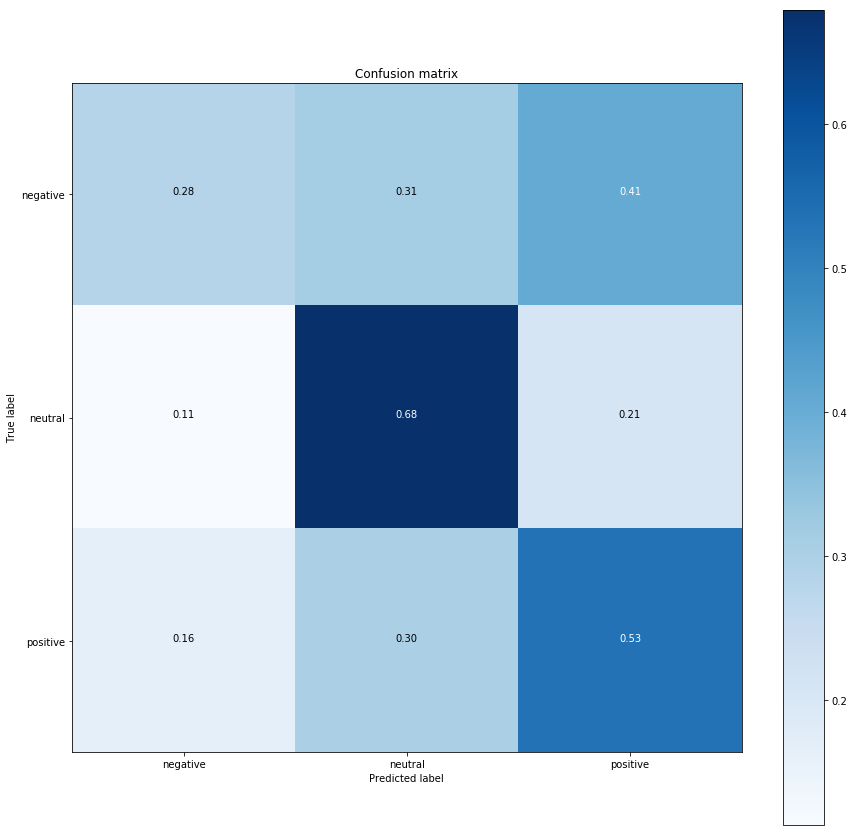

In [26]:
text_labels = ['negative','neutral','positive']

plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()